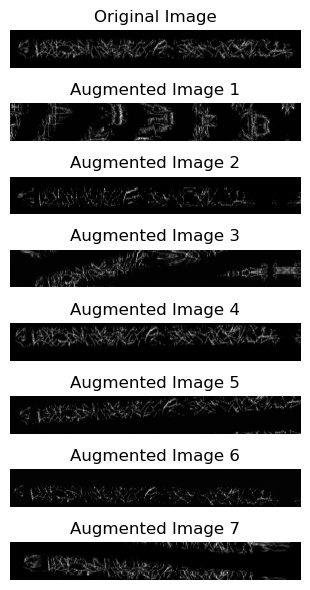

In [33]:
import cv2
import json5
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A

# Define the path to your image file
image_path = '/Users/karan/MTData/Synthetic/Images/image-633.png'  
config_path = '/Users/karan/microsegmentation/segmentation/augmentation-config.json5'

# Load the image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError(f"Image at {image_path} not found or is not valid.")

# Load the JSON5 configuration
with open(config_path, 'r') as file:
    transform_config = json5.load(file)

# Build the list of transformations
transform_list = []
for item in transform_config['transforms']: #type: ignore
    transform_type = item['name']
    params = item.get('params', {})
    try:
        transform_class = getattr(A, transform_type)
        transform = transform_class(**params)
        transform_list.append(transform)
    except AttributeError:
        print(f"Warning: Transformation '{transform_type}' not found in Albumentations.")
    except Exception as e:
        print(f"Error applying transformation '{transform_type}': {e}")

# Compose the augmentations
augmentation = A.Compose(transform_list)

# Apply the augmentations multiple times
num_augmentations = 7
fig, ax = plt.subplots(num_augmentations + 1, 1, figsize=(18, 6))

# Display the original image
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

augmented_images = [None] * num_augmentations
# Display augmented images
for i in range(1, num_augmentations + 1):
    augmented = augmentation(image=image)
    augmented_image = augmented['image']
    augmented_images[i-1] = augmented_image
    # if i == 1:
    #     print(augmented)
    #     print(type(augmented_image))
    # print(augmented_image.max()) #type: ignore

    ax[i].imshow(augmented_image, cmap='gray')
    ax[i].set_title(f'Augmented Image {i}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()
